# Introduction:

In this notebook, we are going to fit a linear regression model. It is going to take a few steps. In order to achieve that we are going to use the `scikit-learn` library.

At first, we need a dataset. Our dataset is `x03.txt`, provided [here](https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html) (access at May 15th, 2020). Our dataset relates age and blood pressure.

Well, before actually fitting our linear regression model, we need to read the dataset properly (once it is not exactly readable by a computer), and we are going to use `pandas` to "store" it.

Our journey is going to be divided into the following steps:

* Step 1: Reading the dataset
* Step 2: Treating the data
* Step 3: Fitting the model
* Step 4: Predicting

In [1]:
# We need to import a few libs and modules that are going to be useful in our project.

import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

# Step 1: Reading the dataset

With the help of `requests` we are going to download the dataset and "clean" it until it is ready to use.

In [2]:
dataset_url = "https://people.sc.fsu.edu/~jburkardt/datasets/regression/x03.txt"

response = requests.get(dataset_url)
dataset_txt = response.text

print(dataset_txt)

#  x03.txt
#
#  Reference:
#
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991, page 304,
#    ISBN 0-12-656460-4.
#
#    D G Kleinbaum and L L Kupper,
#    Applied Regression Analysis and Other Multivariable Methods,
#    Duxbury Press, 1978, page 47.
#
#  Discussion:
#
#    The systolic blood pressure was measured for 30 people of
#    different ages.  A nonzero intercept seems appropriate
#    here, since even a very young person can have a high blood pressure.
#
#    There are 30 rows of data.  The data columns include:
#
#      I,  the index;
#      A0, 1,
#      A1, the age;
#      B,  the systolic blood pressure.
#
#    We seek a model of the form:
#
#      B = A0 * X0 + A1 * X1
#
4 columns
30 rows
Index
One
Age
Systolic Blood Pressure
 1  1  39  144
 2  1  47  220
 3  1  45  138
 4  1  47  145
 5  1  65  162
 6  1  46  142
 7  1  67  170
 8  1  42  124
 9  1  67  158
10  1  56  154
11  1  64  162
12  1  56  150
13  1  59  140
14  

Notice that the text file has a lot of informations that are not essential for our purpose. By looking at it we can notice the first thing we can filter, the "commentaries", the text that follows the `#`.

In [3]:
# Defining a function to remove the lines containing commentaries, it is very rustic, it removes the whole line.

def remove_commentary_lines(file_txt):
    
    raw_file_lines = file_txt.strip().split('\n')
    filtered_file_lines = []
    
    for file_line in raw_file_lines:
        
        if file_line[0] != '#':
            filtered_file_lines.append(file_line)
            
        # The line will pass the filter if its first character isn't '#'.
            
    return filtered_file_lines

filtered_file_lines = remove_commentary_lines(dataset_txt)

print(filtered_file_lines)

['4 columns', '30 rows', 'Index', 'One', 'Age', 'Systolic Blood Pressure', ' 1  1  39  144', ' 2  1  47  220', ' 3  1  45  138', ' 4  1  47  145', ' 5  1  65  162', ' 6  1  46  142', ' 7  1  67  170', ' 8  1  42  124', ' 9  1  67  158', '10  1  56  154', '11  1  64  162', '12  1  56  150', '13  1  59  140', '14  1  34  110', '15  1  42  128', '16  1  48  130', '17  1  45  135', '18  1  17  114', '19  1  20  116', '20  1  19  124', '21  1  36  136', '22  1  50  142', '23  1  39  120', '24  1  21  120', '25  1  44  160', '26  1  53  158', '27  1  63  144', '28  1  29  130', '29  1  25  125', '30  1  69  175']


Nice, notice that now we have a list containing the lines of our `.txt` without the ones that consist of commentaries. Now we need to convert it to a `pandas` dataframe.

In [4]:
def parse_to_dataframe(file_lines):
    
    # Defining a function to find out how many columns and rows the dataset contains.
    def get_dataset_dimension(file_lines):
        
        columns_index = 0
        rows_index = 1
        
        num_columns, _ = file_lines[columns_index].strip().split(" ")
        num_rows, _ = file_lines[rows_index].strip().split(" ")
        
        return int(num_columns), int(num_rows)
    
    # Defining a function to return the categories.
    def get_categories(file_lines, num_categories, first_category_line):
        
        return file_lines[first_category_line : first_category_line + num_categories]
    
    columns, rows = get_dataset_dimension(file_lines)
    
    categories = get_categories(file_lines, columns, 2)
    # The number of categories is the same as the number of columns.
    # The first category line index is 2, since the 0 and 1 indexes are occupied by the dataset dimensions.
    
    dataframe = { key : [] for key in categories }
    
    # Iterating through the data lines:
    first_data_line = 2 + columns
    last_data_line = first_data_line + rows
    for i in range(first_data_line, last_data_line):
        
        data = file_lines[i].strip().split('  ') # Separating each value of the line
        for j in range(len(data)):
            dataframe[categories[j]].append(int(data[j])) # Appending each value to its corresponding key.
        
    df = pd.DataFrame(dataframe, index=dataframe["Index"]) # Parsing the dataframe to pandas dataframe
    return df[[c for c in categories if c != "Index"]] # Removing repeated category
    
df = parse_to_dataframe(filtered_file_lines)
display(df)

,One,Age,Systolic Blood Pressure
1,1,39,144
2,1,47,220
3,1,45,138
4,1,47,145
5,1,65,162
6,1,46,142
7,1,67,170
8,1,42,124
9,1,67,158
10,1,56,154


Ok, now we have our dataset in a nice format. It is easy to read and manipulate.

# Step 2: Treating the data

This step is almost purely statistical, don't worry, I am going to explain each detail.

First thing we need to do: define our __variable of interest__ and our __explanatory variable__.
Our variable of interest is the variable that we are analyzing, the one we want to understand, that is of our _interest_.
The explanatory variable is the one that _may_ dictate the variable of interest, the one that _may_ cause it (if those are somehow related).

Our variable of interest here is "__Systolic Blood Pressure__" and our explanatory variable is "__Age__".

In [5]:
int_var = "Systolic Blood Pressure"
exp_var = "Age"

We have many ways of visualizing the relation of our variables. Let's try a more graphical approach at first.

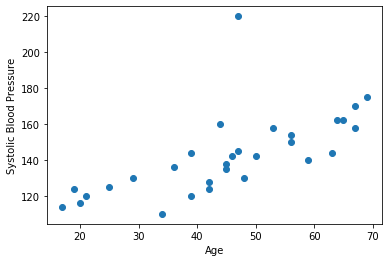

In [6]:
# Plotting our data
plt.xlabel(exp_var)
plt.ylabel(int_var)
plt.scatter(df[exp_var], df[int_var])
plt.show()

We can notice a certain relation, right? There is some logic in it, isn't? We can quantify this relation! It is called a __measure of association__, and the most common method is by checking the __Pearson's correlation coeffcient__, wich is represented by $\rho$ (rho).

Rho varies between -1 and 1, where 0 is the worst value. We want to achieve values next to 1 or -1, because that means we have a correlation. Let's check it for our data.

We can simply obtain our rho from the `stats.pearsonr` command. (More info [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html))

In [7]:
rho, p = stats.pearsonr(df[exp_var], df[int_var])

print(rho, p)

0.6575672831943475 7.867263066701025e-05


Notice that we have one more value besides rho, it is the __p-value__, it is used to measure the __significance__. It is not really important for us right now. But you can read a little more about it at the link provided above.

Well, our rho value is not that good, right? We can kind of see why. We have an __outlier__ that is influencing at it. Outliers are nothing more than values that are "out of the curve", we need to eliminate them in order to have a good linear regression. Let's create a function to remove the outliers. We have to keep in mind that to remove the outliers we must firstly identify them, in order to achieve that we need to know a little value called __Z-score__, the Z-score will allow us to find out how far from the __mean value__ each value is, in terms of __standard deviation__. To find the outliers we are going to set a threshold of $3.0$, that is, if the Z-score of a value is bigger than $3.0$ we are going to consider it an outlier. We can determine every Z-score of our variable of interest using `stats.zscore`.

In [8]:
def identify_outliers(dataframe, int_var, threshold):
    
    zscores = stats.zscore(dataframe[int_var])
    
    return [
        i for i in range(len(dataframe))
        if zscores[i] > threshold
    ]

unfiltered_df = df # Our df is unfiltered, obviously
outliers_indexes = identify_outliers(df, int_var, 3.0)
filtered_df = unfiltered_df.take([
    i for i in range(len(unfiltered_df))
    if i not in outliers_indexes
])

We need to find a way to verify if the outliers are really gone, and one way to do it is by ___boxplotting___ our variable of interest. A boxplot, beside other things, show us if our variable of interest has outliers. The outliers are shown as tiny circles outside the box. Let's do it!

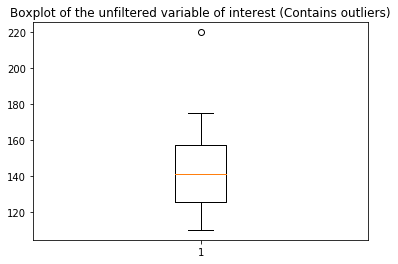

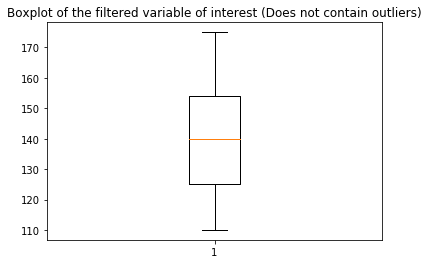

In [9]:
plt.boxplot(unfiltered_df[int_var])
plt.title("Boxplot of the unfiltered variable of interest (Contains outliers)")
plt.show()

plt.boxplot(filtered_df[int_var])
plt.title("Boxplot of the filtered variable of interest (Does not contain outliers)")
plt.show()

Since we don't have outliers anymore, let's see our new Pearson coefficient.

In [10]:
rho, _ = stats.pearsonr(filtered_df[exp_var], filtered_df[int_var])

print(rho)

0.8439069051978128


It improved A __LOT!__ That's why you __always__ need to remove the outliers. Now, let's go to the next step.

# Step 3: Fitting the model

Finally! That's where we are going to fit our model (duh). And it's the easiest part of the job. You just need to "create" small inputs. You already have the inputs, you just need to parse them to numpy arrays.

In [11]:
x = np.array(filtered_df[exp_var]).reshape(-1, 1)
# You need to reshape x, or you are going to have problems in the fit function.
y = np.array(filtered_df[int_var])

Well, think a bit with me now. $y$ is a function of $x$, right?
In a linear regression what we want is to obtain a set of values ($y$) from a given input ($x$). So we have a first degree polynomial, yes? It is something like $y = {A}_1 \cdot x + {A}_2$ where ${A}_1$ is the __coefficient__ and ${A}_2$ is the __intercept__. In `numpy` an unidimensional set of values is represented like a vector, so you want to have an  ${A}_1$ that multiplied by your vector $x$ and added to ${A}_2$ results in a vector $y$. That's exactly what the fitting does, it finds a function that describes (or at least tries to) $y$ in function of $x$ and can return you ${A}_1$ and ${A}_2$. Let's fit!

In [12]:
model = LinearRegression().fit(x, y)
a1 = model.coef_
a2 = model.intercept_

Let's verify if our model works.

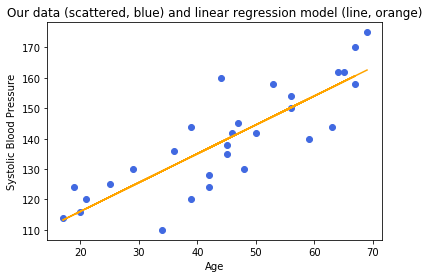

In [13]:
plt.title("Our data (scattered, blue) and linear regression model (line, orange)")
plt.scatter(filtered_df[exp_var], filtered_df[int_var], color="royalblue")
plt.plot(filtered_df[exp_var], a1 * filtered_df[exp_var] + a2, color="orange")
plt.xlabel(exp_var)
plt.ylabel(int_var)
plt.show()

Well, the model describes the behaviour nicely, right? Let's do a few predictions.

# Step 4: Predicting

The biggest advantage for linear regression models is that we can predict for every input in the set of real numbers, with a little of responsibility, right? (We won't predict for negative ages, for example)

Let's try to predict the systolic blood pressure for a 22 years old person, we don't have this data.

In [14]:
age = 22
systolic_blood_pressure = age * a1 + a2

print(systolic_blood_pressure)

[117.96218009]


That's a pretty credible value, right?

But we can do even more, we can simulate scenarios. Let's generate a set of ages.

In [15]:
sim_x = [ np.random.randint(18, 90) for i in range(100) ] # Generating 100 random ages from 18 to 90.

And let's generate the expected results for every age and add some chaos to it (adding some pseudo-random numbers).

In [16]:
sim_y = [ np.random.randint(-180, 180) / 10 + a1 * sim_x[i] + a2 for i in range(100) ] # Generating some realistic results.

Let's visualize it, shall we?

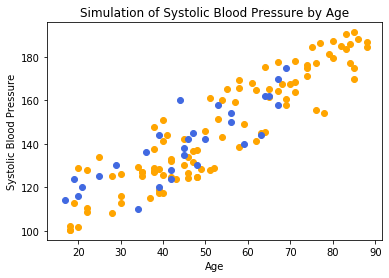

In [17]:
plt.title("Simulation of Systolic Blood Pressure by Age")
plt.scatter(sim_x, sim_y, color="orange")
plt.scatter(filtered_df[exp_var], filtered_df[int_var], color="royalblue")
plt.xlabel(exp_var)
plt.ylabel(int_var)
plt.show()